# Import Libraries & Datasets


## KNN Classification model

In [2]:
# Import KNeighborsClassifier (KNN)
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


churn_df = pd.read_csv("datasets/telecom_churn_clean.csv")
print(churn_df.head())

   Unnamed: 0  account_length  area_code  international_plan  voice_mail_plan  \
0           0             128        415                   0                1   
1           1             107        415                   0                1   
2           2             137        415                   0                0   
3           3              84        408                   1                0   
4           4              75        415                   1                0   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4             

In [3]:
# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values


# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

X_new = np.array([[30.0, 17.5], [107.0, 24.1], [213.0, 10.9]])

# Predict the labels for the training data X
y_pred = knn.predict(X_new)
print(f"Prediction: {y_pred}")

Prediction: [0 1 0]


# Train/Test split


In [4]:
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
# Stratification is important for classification problems

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y
)

knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8575712143928036


# Overfitting & Underfitting


In [5]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

max = 0  # Initialize the maximum sum of accuracies pair
best_k = 0  # Initialize the best k

for neighbor in neighbors:
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)

    # Fit the model
    knn.fit(X_train, y_train)

    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

    if test_accuracies[neighbor] > max:
        max = test_accuracies[neighbor]
        best_k = neighbor

print(f"Best k = {best_k}")

Best k = 4


# Visualizing model complexity


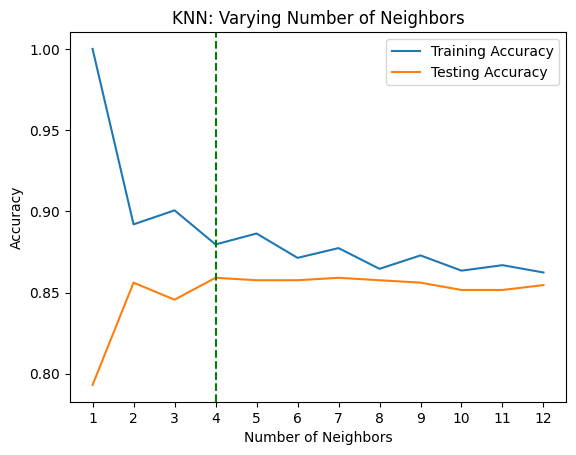

In [6]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.axvline(x=best_k, color="green", linestyle="--")
plt.xticks(neighbors)

# Display the plot
plt.show()

## Performance Evaluation using `Confusion Matrix`

In [7]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix, classification_report


knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[570   0]
 [ 95   2]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       570
           1       1.00      0.02      0.04        97

    accuracy                           0.86       667
   macro avg       0.93      0.51      0.48       667
weighted avg       0.88      0.86      0.79       667

